In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('data/data_with_target.csv')

In [3]:
df.isnull().sum()

Unnamed: 0            0
track_id              0
album_comments        0
album_date_created    0
album_favorites       0
                     ..
listens_month         0
bonus_listens         0
listens_incl_bonus    0
listens_bins          0
genre_pred            0
Length: 560, dtype: int64

In [4]:
df.describe()

,Unnamed: 0,track_id,album_comments,album_favorites,album_id,album_listens,album_tracks,artist_comments,artist_favorites,artist_id,...,zcr_std_01,track_title_char_count,album_information_bin,artist_bio_bin,months_life,listens_month,bonus_listens,listens_incl_bonus,listens_bins,genre_pred
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000
mean,3999.50000,84126.770125,0.538625,2.025250,13528.950125,38310.885250,11.133625,2.816250,41.649000,12984.194250,...,0.040383,16.47000,0.812750,0.739250,46.713625,172.897367,19.180750,4748.862875,2.505000,2.12500
std,2309.54541,43297.426287,1.392211,3.825728,6022.260415,63144.554876,8.086096,7.320293,111.371453,6994.459659,...,0.025868,11.38687,0.390136,0.439071,28.929487,326.865078,157.484017,12220.622958,1.106064,1.45246
min,0.00000,2.000000,0.000000,0.000000,1.000000,1008.000000,1.000000,0.000000,0.000000,1.000000,...,0.002608,1.00000,0.000000,0.000000,1.000000,2.742574,0.000000,196.000000,1.000000,1.00000
25%,1999.75000,49063.500000,0.000000,0.000000,9034.000000,7969.000000,6.000000,0.000000,2.000000,7295.000000,...,0.022612,9.00000,1.000000,0.000000,21.000000,27.144267,0.000000,1273.750000,2.000000,1.00000
50%,3999.50000,89281.000000,0.000000,1.000000,14793.000000,16996.000000,9.000000,0.000000,8.000000,13830.000000,...,0.033839,14.00000,1.000000,1.000000,44.000000,71.685055,0.000000,2505.500000,3.000000,1.00000
75%,5999.25000,122545.000000,0.000000,2.000000,18512.000000,40793.000000,14.000000,2.000000,25.000000,19459.000000,...,0.051452,20.00000,1.000000,1.000000,70.000000,191.795493,0.000000,4937.000000,3.000000,4.00000
max,7999.00000,155066.000000,12.000000,40.000000,22899.000000,674347.000000,47.000000,68.000000,963.000000,24252.000000,...,0.317725,152.00000,1.000000,1.000000,101.000000,9839.750000,3579.000000,543252.000000,4.000000,4.00000


In [12]:
df['track_duration'].value_counts().sort_index(ascending=True)

track_duration
60     23
61     13
62     12
63      8
64     12
       ..
596     1
597     1
598     1
599     4
600     4
Name: count, Length: 517, dtype: int64

In [10]:
df['track_duration'].unique()

array([168, 206, 161, 253, 182, 138, 228, 249, 254, 192,  68, 194, 195,
       324,  96, 184, 247, 230, 202, 280,  76, 301,  80, 309, 319, 267,
       445, 519, 205, 234, 235, 246, 197, 290, 291, 104, 310, 369, 312,
       330, 289, 338, 283, 297, 128,  90, 146, 200, 323,  83, 137, 480,
       275,  86, 298, 520, 475, 169, 110,  93,  62, 187, 472, 315, 327,
       286, 212, 221, 566, 208, 149, 145, 592, 232, 248, 423, 216,  91,
       370, 139, 127, 282, 250, 436, 274, 354, 308, 374, 285, 543, 386,
       288, 435, 175, 269, 341, 276, 132, 158, 303, 167, 170, 233, 453,
       257, 244, 171, 166, 174, 173, 349, 242, 130, 210, 245, 240, 318,
       541, 180, 444, 594, 363, 258, 419, 316, 489, 467, 263, 508, 264,
       337, 410, 361, 218, 388, 157, 150, 353, 403,  79, 255, 273, 259,
       227, 148, 268, 296, 236, 159, 222, 183, 141, 201, 261, 393, 307,
       317, 557, 294, 241, 237, 277, 215, 238, 313, 117, 199, 392, 332,
       376, 121, 131, 165, 124, 151, 120, 243, 214, 345, 211, 22

In [6]:
df.columns

Index(['Unnamed: 0', 'track_id', 'album_comments', 'album_date_created',
       'album_favorites', 'album_id', 'album_listens', 'album_title',
       'album_tracks', 'album_type',
       ...
       'soundcloud_website', 'track_title_char_count', 'album_information_bin',
       'artist_bio_bin', 'months_life', 'listens_month', 'bonus_listens',
       'listens_incl_bonus', 'listens_bins', 'genre_pred'],
      dtype='object', length=560)

In [7]:
df.head()

,Unnamed: 0,track_id,album_comments,album_date_created,album_favorites,album_id,album_listens,album_title,album_tracks,album_type,...,soundcloud_website,track_title_char_count,album_information_bin,artist_bio_bin,months_life,listens_month,bonus_listens,listens_incl_bonus,listens_bins,genre_pred
0,0,2,0,2008-11-26 01:44:45,4,1,6073,AWOL - A Way Of Life,7,Album,...,False,4,1,1,101,12.801980,0.0,1293.0,2,1
1,1,5,0,2008-11-26 01:44:45,4,1,6073,AWOL - A Way Of Life,7,Album,...,False,10,1,1,101,11.396040,0.0,1151.0,1,1
2,2,10,0,2008-11-26 01:45:08,4,6,47632,Constant Hitmaker,2,Album,...,False,7,0,1,101,496.386139,0.0,50135.0,4,1
3,3,140,1,2008-11-26 01:49:59,1,61,1300,The Blind Spot,1,Album,...,False,18,1,1,101,12.861386,0.0,1299.0,2,1
4,4,141,0,2008-11-26 01:49:57,1,60,1304,Every Man For Himself,2,Album,...,False,4,1,1,101,7.178218,0.0,725.0,1,1


In [8]:
df['track_listens'].nunique()

4927

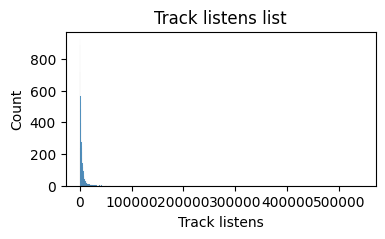

In [9]:
plt.figure(figsize=(4,2))
sns.histplot(data = df,x= 'track_listens')
plt.title('Track listens list')
plt.xlabel('Track listens')
plt.ylabel('Count')
plt.show()

/var/folders/8w/myfdtq1d7b72n5nwcbg2dlyh0000gn/T/ipykernel_1756/3558468645.py:1: FutureWarning: The provided callable <function mean at 0x103e01e40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  result = df.groupby(["track_genre_top"])['track_listens'].aggregate(np.mean).reset_index().sort_values(by=['track_listens'], ascending=False)
/var/folders/8w/myfdtq1d7b72n5nwcbg2dlyh0000gn/T/ipykernel_1756/3558468645.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='track_genre_top', y='track_listens', data=result, order=result['track_genre_top'], estimator='mean', ci=None)


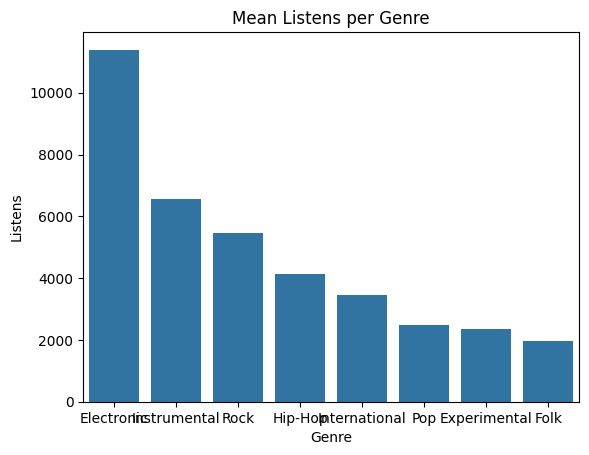

In [12]:
result = df.groupby(["track_genre_top"])['track_listens'].aggregate(np.mean).reset_index().sort_values(by=['track_listens'], ascending=False)

# Use sns.barplot correctly
ax = sns.barplot(x='track_genre_top', y='track_listens', data=result, order=result['track_genre_top'], estimator='mean', ci=None)
ax.set(xlabel='Genre', ylabel='Listens', title="Mean Listens per Genre")

plt.show()

In [13]:
ax.set(xlabel='common xlabel', ylabel='common ylabel')
plt.show()

In [14]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].hist(x=df['listens_month'], bins=1000)  # creates histogram for number of views
ax[0][0].set_ylabel("Genre", fontsize = 10) # sets the label y-axis
ax[0][0].set_xlim(0,1000) # limits the x-axis values from 0 to 1000000 
ax[0][0].set_title("Distribution of listens in month", fontsize = 15);  # sets title for subplot

ax[0][1].hist(x= df['album_id'], bins=2000)
ax[0][1].set_ylabel("Genre", fontsize = 10)
ax[0][1].set_xlim(0,20000)
ax[0][1].set_title("Distribution of album ID", fontsize = 15);

ax[0][2].hist(x=df['album_listens'], bins=500000)
ax[0][2].set_ylabel("Genre", fontsize = 10)
ax[0][2].set_xlim(0,5000)
ax[0][2].set_title("Distribution of album listens", fontsize = 15);

ax[1][0].hist(x=df['track_genre_top'], bins=10)
ax[1][0].set_ylabel("Genre", fontsize = 10)
ax[1][0].set_xlim(0,10)
ax[1][0].set_title("Distribution of genre top", fontsize = 15);
                              
ax[1][1].hist(x=df['listens_bins'], bins=100)
ax[1][1].set_ylabel("Genre", fontsize = 10)
ax[1][1].set_xlim(-1,1)
ax[1][1].set_title("Distribution of bins", fontsize = 15);

fig.delaxes(ax[1][2]);

KeyboardInterrupt: 